# Generating Trade Signals using Moving Average Crossover Strategy

In [1]:
# import necessary libraries 

%matplotlib inline
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import warnings
warnings.filterwarnings('ignore')

## Simple Moving Average(SMA) Crossover strategy

In [3]:
# import the closing price data of the Ultratech Cement stock for the period of 2 years -
# from 1st Feb 2018 to 1st Feb 2020

import pandas_datareader.data as web

start = datetime.datetime(2018, 2, 1)
end = datetime.datetime(2020, 2, 1)

ultratech_df = web.DataReader(['ULTRACEMCO.NS'], 'yahoo', start = start, end = end)['Close']
ultratech_df.columns = {'Close Price'}
ultratech_df.head()

,Close Price
Date,
2018-02-01,4391.450195
2018-02-02,4179.450195
2018-02-05,4146.399902
2018-02-06,4092.649902
2018-02-07,4081.550049


> Note: The SMAs are calculated on closing prices and not adjusted close because we want the trade signal to be generated on the price data and not influenced by dividends paid.

In [4]:
# check for null values 

ultratech_df.isnull().sum()

Close Price    0
dtype: int64

In [5]:
# shape of the dataframe

ultratech_df.shape

(489, 1)

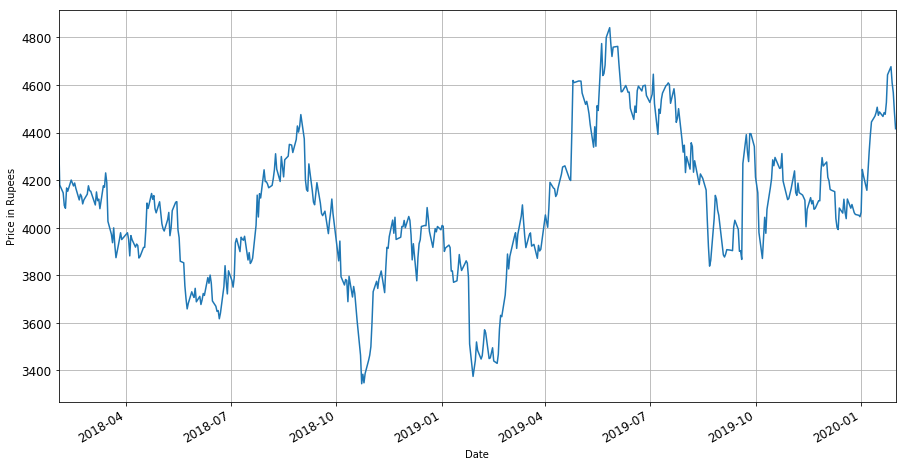

In [6]:
# observe general price variation of the closing price for the give period

#sns.set(style = 'whitegrid')
ultratech_df['Close Price'].plot(figsize = (15, 8), fontsize = 12)
plt.grid()
plt.ylabel('Price in Rupees')
plt.show()

In [7]:
# Create 20 days simple moving average column
ultratech_df['20_SMA'] = ultratech_df['Close Price'].rolling(window = 20, min_periods = 1).mean()

# Create 50 days simple moving average column
ultratech_df['50_SMA'] = ultratech_df['Close Price'].rolling(window = 50, min_periods = 1).mean()

ultratech_df.head()

,Close Price,20_SMA,50_SMA
Date,,,
2018-02-01,4391.450195,4391.450195,4391.450195
2018-02-02,4179.450195,4285.450195,4285.450195
2018-02-05,4146.399902,4239.100098,4239.100098
2018-02-06,4092.649902,4202.487549,4202.487549
2018-02-07,4081.550049,4178.300049,4178.300049


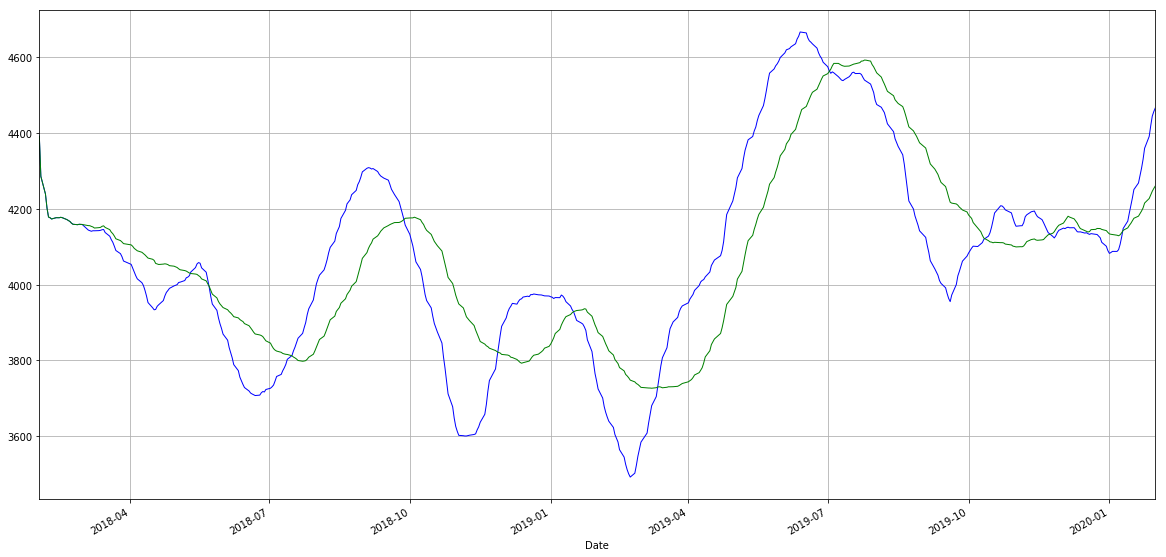

In [8]:
# plot short and long moving averages 

plt.figure(figsize = (20, 10))
#ultratech_df['Close Price'].plot(color = 'k', lw = 1)
ultratech_df['20_SMA'].plot(color = 'b', lw = 1)
ultratech_df['50_SMA'].plot(color = 'g', lw = 1)
plt.grid()
plt.show()

In [10]:
# create a new column 'Signal' such that if 20-day SMA is greater than 50-day SMA then set Signal as 1 else 0.

ultratech_df['Signal'] = 0.0  
ultratech_df['Signal'] = np.where(ultratech_df['20_SMA'] > ultratech_df['50_SMA'], 1.0, 0.0) 

# create a new column 'Position' which is a day-to-day difference of the 'Signal' column. 
ultratech_df['Position'] = ultratech_df['Signal'].diff()

# display the dataframe
ultratech_df.head(10)

,Close Price,20_SMA,50_SMA,Signal,Position
Date,,,,,
2018-02-01,4391.450195,4391.450195,4391.450195,0.0,NaN
2018-02-02,4179.450195,4285.450195,4285.450195,0.0,0.0
2018-02-05,4146.399902,4239.100098,4239.100098,0.0,0.0
2018-02-06,4092.649902,4202.487549,4202.487549,0.0,0.0
2018-02-07,4081.550049,4178.300049,4178.300049,0.0,0.0
2018-02-08,4167.000000,4176.416707,4176.416707,0.0,0.0
2018-02-09,4153.299805,4173.114293,4173.114293,0.0,0.0
2018-02-12,4200.299805,4176.512482,4176.512482,0.0,0.0
2018-02-14,4175.500000,4176.399984,4176.399984,0.0,0.0


Note that Postion = 1 indicates a 'buy' call and Postition = -1 indicates 'sell' call

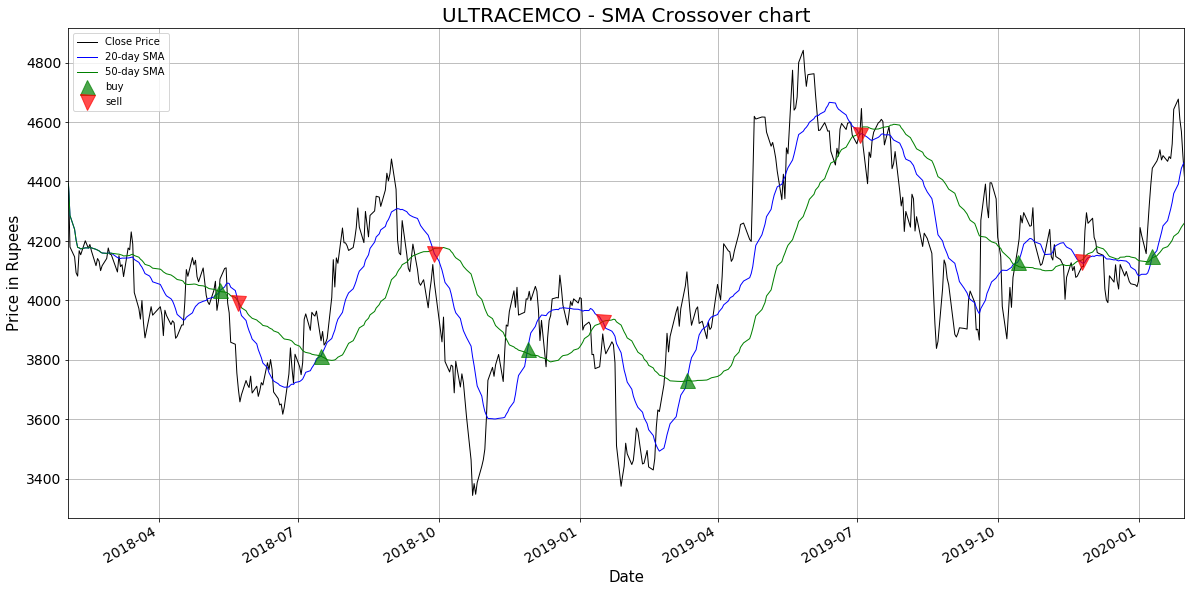

In [11]:
plt.figure(figsize = (20,10))
plt.tick_params(axis = 'both', labelsize = 14)
# plot close price, short-term and long-term moving averages 
ultratech_df['Close Price'].plot(color = 'k', lw = 1, label = 'Close Price')  
ultratech_df['20_SMA'].plot(color = 'b', lw = 1, label = '20-day SMA') 
ultratech_df['50_SMA'].plot(color = 'g', lw = 1, label = '50-day SMA') 

# plot 'buy' signals
plt.plot(ultratech_df[ultratech_df['Position'] == 1].index, 
         ultratech_df['20_SMA'][ultratech_df['Position'] == 1], 
         '^', markersize = 15, color = 'g', alpha = 0.7, label = 'buy')

# plot 'sell' signals
plt.plot(ultratech_df[ultratech_df['Position'] == -1].index, 
         ultratech_df['20_SMA'][ultratech_df['Position'] == -1], 
         'v', markersize = 15, color = 'r', alpha = 0.7, label = 'sell')
plt.ylabel('Price in Rupees', fontsize = 15 )
plt.xlabel('Date', fontsize = 15 )
plt.title('ULTRACEMCO - SMA Crossover chart', fontsize = 20)
plt.legend()
plt.grid()
plt.show()

## Exponential Moving Average(EMA) Crossover strategy

In [13]:
# import the closing price data of the Ultratech Cement stock for the period of 2 years -
# from 1st Feb 2018 to 1st Feb 2020

import pandas_datareader.data as web

start = datetime.datetime(2018, 2, 1)
end = datetime.datetime(2020, 2, 1)

ultratech_df = web.DataReader(['ULTRACEMCO.NS'], 'yahoo', start = start, end = end)['Close']
ultratech_df.columns = {'Close Price'}
ultratech_df.head()

,Close Price
Date,
2018-02-01,4391.450195
2018-02-02,4179.450195
2018-02-05,4146.399902
2018-02-06,4092.649902
2018-02-07,4081.550049


In [14]:
# Create 20 days exponential moving average column
ultratech_df['20_EMA'] = ultratech_df['Close Price'].ewm(span = 20, adjust = False).mean()

# Create 50 days exponential moving average column
ultratech_df['50_EMA'] = ultratech_df['Close Price'].ewm(span = 50, adjust = False).mean()

ultratech_df.head()

,Close Price,20_EMA,50_EMA
Date,,,
2018-02-01,4391.450195,4391.450195,4391.450195
2018-02-02,4179.450195,4371.259719,4383.136470
2018-02-05,4146.399902,4349.844498,4373.852683
2018-02-06,4092.649902,4325.349775,4362.825123
2018-02-07,4081.550049,4302.130753,4351.794728


In [15]:
# create a new column 'Signal' such that if 20-day SMA is greater than 50-day SMA then set Signal as 1 else 0.

ultratech_df['Signal'] = 0.0  
ultratech_df['Signal'] = np.where(ultratech_df['20_EMA'] > ultratech_df['50_EMA'], 1.0, 0.0) 

# create a new column 'Position' which is a day-to-day difference of the 'Signal' column. 
ultratech_df['Position'] = ultratech_df['Signal'].diff()

# display the dataframe
ultratech_df.head(10)

,Close Price,20_EMA,50_EMA,Signal,Position
Date,,,,,
2018-02-01,4391.450195,4391.450195,4391.450195,0.0,NaN
2018-02-02,4179.450195,4371.259719,4383.136470,0.0,0.0
2018-02-05,4146.399902,4349.844498,4373.852683,0.0,0.0
2018-02-06,4092.649902,4325.349775,4362.825123,0.0,0.0
2018-02-07,4081.550049,4302.130753,4351.794728,0.0,0.0
2018-02-08,4167.000000,4289.261158,4344.547876,0.0,0.0
2018-02-09,4153.299805,4276.312458,4337.047951,0.0,0.0
2018-02-12,4200.299805,4269.073157,4331.685279,0.0,0.0
2018-02-14,4175.500000,4260.161428,4325.560366,0.0,0.0


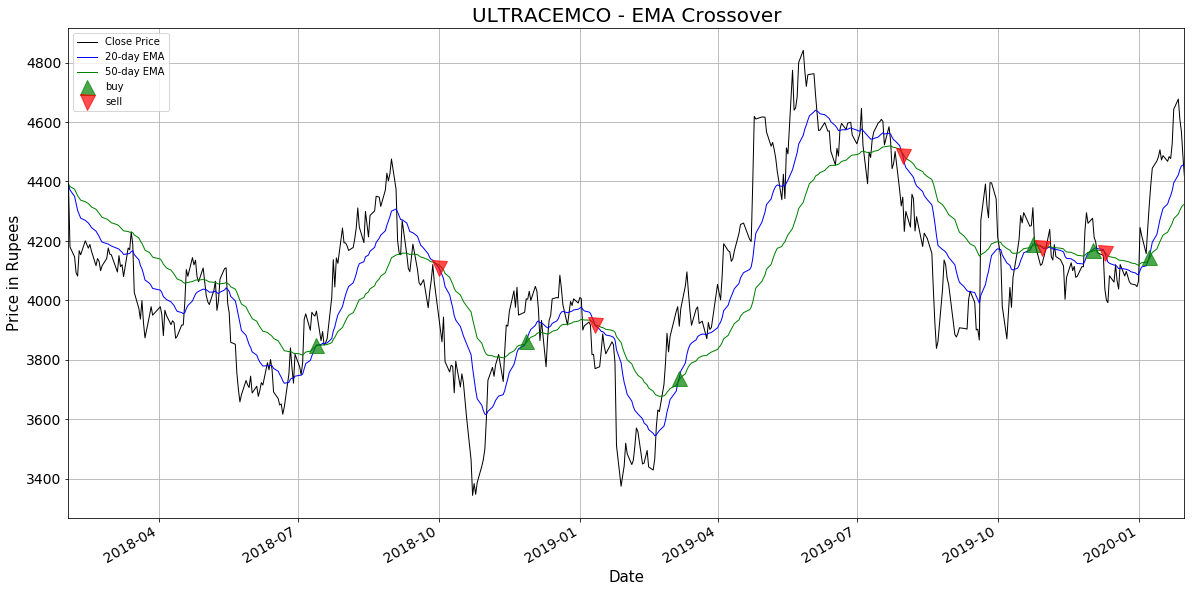

In [17]:
plt.figure(figsize = (20,10))
plt.tick_params(axis = 'both', labelsize = 14)
# plot close price, short-term and long-term moving averages 
ultratech_df['Close Price'].plot(color = 'k', lw = 1, label = 'Close Price')  
ultratech_df['20_EMA'].plot(color = 'b', lw = 1, label = '20-day EMA') 
ultratech_df['50_EMA'].plot(color = 'g', lw = 1, label = '50-day EMA') 

# plot 'buy' signals
plt.plot(ultratech_df[ultratech_df['Position'] == 1].index, 
         ultratech_df['20_EMA'][ultratech_df['Position'] == 1], 
         '^', markersize = 15, color = 'g', alpha = 0.7, label = 'buy')

# plot 'sell' signals
plt.plot(ultratech_df[ultratech_df['Position'] == -1].index, 
         ultratech_df['20_EMA'][ultratech_df['Position'] == -1], 
         'v', markersize = 15, color = 'r', alpha = 0.7, label = 'sell')
plt.ylabel('Price in Rupees', fontsize = 15 )
plt.xlabel('Date', fontsize = 15 )
plt.title('ULTRACEMCO - EMA Crossover', fontsize = 20)
plt.legend();
plt.grid()
plt.show()

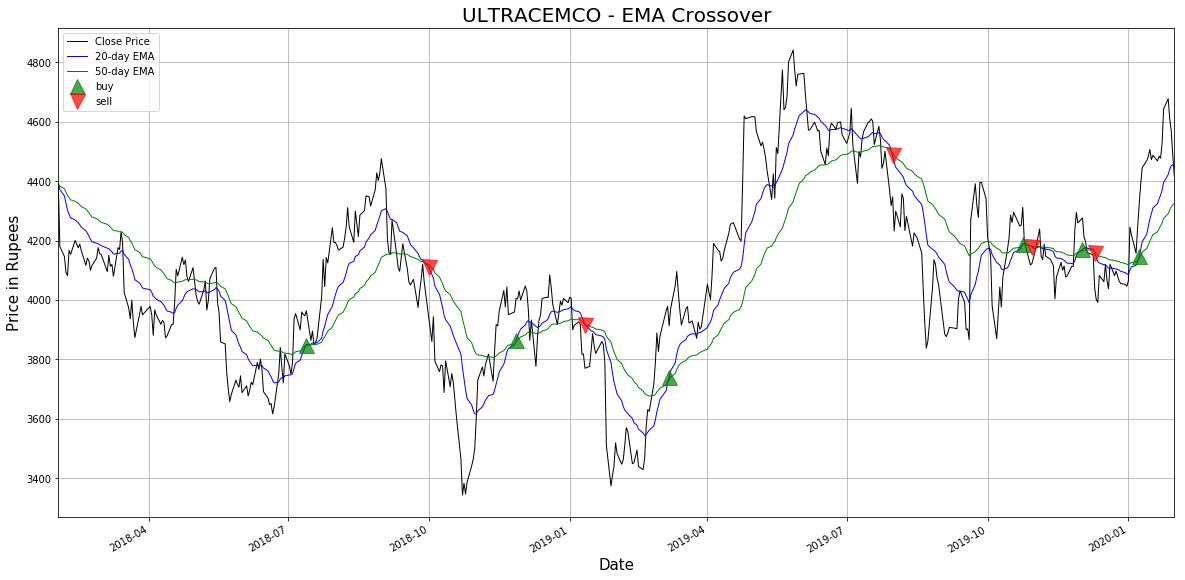

In [55]:
# import the closing price data of the Ultratech Cement stock for the period of 2 years -
# from 1st Feb 2018 to 1st Feb 2020

import pandas_datareader.data as web

start = datetime.datetime(2018, 2, 1)
end = datetime.datetime(2020, 2, 1)

ultratech_df = web.DataReader(['ULTRACEMCO.NS'], 'yahoo', start = start, end = end)['Close']
ultratech_df.columns = {'Close Price'}

# Create 20 days exponential moving average column
ultratech_df['20_EMA'] = ultratech_df['Close Price'].ewm(span = 20, adjust = False).mean()

# Create 50 days exponential moving average column
ultratech_df['50_EMA'] = ultratech_df['Close Price'].ewm(span = 50, adjust = False).mean()

# create a new column 'Signal' such that if 20-day EMA is greater than 50-day SMA then set Signal as 1 else 0.
ultratech_df['Signal'] = 0.0  
ultratech_df['Signal'] = np.where(ultratech_df['20_EMA'] > ultratech_df['50_EMA'], 1.0, 0.0)
        
# create a new column 'Position' which is a day-to-day difference of the 'Signal' column. 
ultratech_df['Position'] = ultratech_df['Signal'].diff()

plt.figure(figsize = (20,10))
# plot close price, short-term and long-term moving averages 
ultratech_df['Close Price'].plot(color = 'k', lw = 1, label = 'Close Price')  
ultratech_df['20_EMA'].plot(color = 'b', lw = 1, label = '20-day EMA') 
ultratech_df['50_EMA'].plot(color = 'g', lw = 1, label = '50-day EMA') 

# plot 'buy' signals
plt.plot(ultratech_df[ultratech_df['Position'] == 1].index, 
         ultratech_df['20_EMA'][ultratech_df['Position'] == 1], 
         '^', markersize = 15, color = 'g', alpha = 0.7, label = 'buy')

# plot 'sell' signals
plt.plot(ultratech_df[ultratech_df['Position'] == -1].index, 
         ultratech_df['20_EMA'][ultratech_df['Position'] == -1], 
         'v', markersize = 15, color = 'r', alpha = 0.7, label = 'sell')
plt.ylabel('Price in Rupees', fontsize = 15 )
plt.xlabel('Date', fontsize = 15 )
plt.title('ULTRACEMCO - EMA Crossover', fontsize = 20)
plt.legend()
plt.grid()
plt.show()

In [54]:
from tabulate import tabulate

df_new = ultratech_df[(ultratech_df['Position'] == 1) | (ultratech_df['Position'] == -1)]
df_new['Position'] = df_new['Position'].apply(lambda x: 'Buy' if x == 1 else 'Sell')
print(tabulate(df_new, headers = 'keys', tablefmt = 'psql'))

+---------------------+---------------+----------+----------+----------+------------+
| Date                |   Close Price |   20_EMA |   50_EMA |   Signal | Position   |
|---------------------+---------------+----------+----------+----------+------------|
| 2018-07-13 00:00:00 |       3963.75 |  3849.95 |  3847.65 |        1 | Buy        |
| 2018-10-01 00:00:00 |       3940.2  |  4110.15 |  4119.27 |        0 | Sell       |
| 2018-11-27 00:00:00 |       4005    |  3863.69 |  3858.31 |        1 | Buy        |
| 2019-01-11 00:00:00 |       3770.2  |  3915.96 |  3917.93 |        0 | Sell       |
| 2019-03-07 00:00:00 |       3912.8  |  3739.64 |  3731.31 |        1 | Buy        |
| 2019-07-31 00:00:00 |       4346.9  |  4486.5  |  4494.76 |        0 | Sell       |
| 2019-10-24 00:00:00 |       4311.55 |  4189.25 |  4185.09 |        1 | Buy        |
| 2019-10-30 00:00:00 |       4122.7  |  4177.32 |  4180.52 |        0 | Sell       |
| 2019-12-02 00:00:00 |       4276.25 |  4169.91 |  41